In [1]:
import pandas as pd


Abrir dataset con las noticias a trabajar

In [2]:
npr = pd.read_csv("C:\\Users\\fabia\\Desktop\\PLN\\NewsF.csv", sep=';')

In [3]:
npr.head()

,Unnamed: 0,Type,News
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...


# Aplicacion latenete de Thursay (LDA)

Preprocesamiento

In [4]:
#Vectorizacion

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
#max_df: Elimina los terminos que se repiten en gran parte de los documentos y se indica la probabilidad de frecuencia de los terminos a eliminar
#min_df: Elimina los terminos que aparecen con muy poca frecuencia en los documentos y se indica la frecuenci minima con un numero de apariciones
#stop_words: Elimina las palabras innecesarias como los conectores, espacios, etc. Se indica el idioma.

In [7]:
#Creacion de matris con las modificaciones o transformaciones correspondientes

In [8]:
dtm = cv.fit_transform(npr['News'])

In [9]:
dtm

<2225x17473 sparse matrix of type '<class 'numpy.int64'>'
	with 310493 stored elements in Compressed Sparse Row format>

Realizar latente

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
#n_components: Numero de temas en el documento
#random_state: 

Ajustar LDA respecto a la matriz de giro de documentos

In [19]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Captr el vocabulario de palabras

In [20]:
len(cv.get_feature_names())

17473

In [21]:
#Lista de palabras de todos los documentos
type(cv.get_feature_names())

list

In [22]:
#Seleccionar palabras
cv.get_feature_names()[10000]

'mathieu'

In [23]:
#Seleccion de palabras aleatorias
import random
random_word_id = random.randint(0,17473)
cv.get_feature_names()[random_word_id]

'overview'

Captar los temas

In [24]:
len(LDA.components_)

5

In [25]:
#Matriz de py que contiene probabilidades para cada palabra
type(LDA.components_)

numpy.ndarray

In [26]:
#Forma de la matriz
LDA.components_.shape

(5, 17473)

In [27]:
#Vista de componentes
LDA.components_

array([[2.26622616e+00, 3.45874966e+01, 4.11999271e+01, ...,
        7.60895727e+00, 2.00828990e-01, 2.19989596e+00],
       [2.02700090e+00, 2.76161223e+02, 2.00016493e-01, ...,
        2.01501593e-01, 2.00000069e-01, 2.00000240e-01],
       [2.00000712e-01, 1.72652911e+01, 2.00000364e-01, ...,
        2.34155988e+00, 4.19917067e+00, 2.00000479e-01],
       [2.00679049e-01, 1.50195674e+02, 2.00005970e-01, ...,
        2.00611652e-01, 2.00000155e-01, 2.00103024e-01],
       [2.30609318e+00, 3.26790316e+02, 2.00050024e-01, ...,
        4.64736960e+00, 2.00000113e-01, 2.00000294e-01]])

In [28]:
#Trabajando con un tema
single_topic = LDA.components_[0]

In [29]:
#Ordenar los indices de la matriz de la mas baja a la mas alta
single_topic.argsort()

array([13214,  5925,  1602, ..., 13725,  2177,  6422], dtype=int64)

In [32]:
import numpy as np
#Ejemplo
arr = np.array([10,200,3])
arr.argsort()

array([2, 0, 1], dtype=int64)

In [33]:
#10 palabras mas frecuentes en el tema 1
single_topic.argsort()[-10:]

array([ 5758, 17251, 15909, 10773, 17292,  6920, 17387, 13725,  2177,
        6422], dtype=int64)

In [34]:
top_ten_words = single_topic.argsort()[-10:]

In [35]:
for index in top_ten_words:
    print(cv.get_feature_names()[index])

england
won
time
new
world
game
year
said
best
film


In [36]:
#Captar las palabras de mayor probabilidad por tema

In [37]:
for index,topic in enumerate(LDA.components_):
    print(f'Las principales 15 palabras del tema #(index)')
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

Las principales 15 palabras del tema #(index)
['win', 'just', 'awards', 'years', 'games', 'england', 'won', 'time', 'new', 'world', 'game', 'year', 'said', 'best', 'film']




Las principales 15 palabras del tema #(index)
['brown', 'told', 'minister', 'music', 'mobile', 'uk', 'blair', 'party', 'election', 'new', 'labour', 'government', 'people', 'mr', 'said']




Las principales 15 palabras del tema #(index)
['good', 'cup', 'players', 'year', 'league', 'open', 'play', 'match', 'chelsea', 'united', 'time', 'win', 'game', 'club', 'said']




Las principales 15 palabras del tema #(index)
['microsoft', 'information', 'computer', 'search', 'use', 'security', 'china', 'world', 'new', 'net', 'users', 'mr', 'software', 'people', 'said']




Las principales 15 palabras del tema #(index)
['years', 'economic', '000', 'uk', 'firm', 'mr', 'economy', '2004', 'growth', 'market', 'new', 'sales', 'company', 'year', 'said']






In [38]:
#Documento original convertido en matriz
dtm

<2225x17473 sparse matrix of type '<class 'numpy.int64'>'
	with 310493 stored elements in Compressed Sparse Row format>

In [39]:
#Datos
npr.head()

,Unnamed: 0,Type,News
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...


In [40]:
#Agregar analisis a conjunto de datos con el titulo e cada tema

In [41]:
#Crear lista con temas reales de la matriz dtm
topic_result = LDA.transform(dtm)

In [42]:
#Matrizcon los temas
topic_result.shape

(2225, 5)

In [45]:
#provavilidades de pertenecer a un tema en particular redondeado
topic_result[0].round(2)

array([0.04, 0.  , 0.  , 0.18, 0.78])

In [46]:
#Tema al que pertenece cada articulo
topic_result[0].argmax()

4

In [51]:
npr['Tema_LDA'] = topic_result.argmax(axis=1)

In [52]:
npr.head()

,Unnamed: 0,Type,News,Tema,Tema_LDA
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4,4
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4,4
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,3,3
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4,4
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4,4


# No negativa Matriz factorizacion

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfildf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
#max_df: Elimina los terminos que se repiten en gran parte de los documentos y se indica la probabilidad de frecuencia de los terminos a eliminar
#min_df: Elimina los terminos que aparecen con muy poca frecuencia en los documentos y se indica la frecuenci minima con un numero de apariciones
#stop_words: Elimina las palabras innecesarias como los conectores, espacios, etc. Se indica el idioma.

In [55]:
#Crear matriz de valores con las noticias del dataset
dmt = tfildf.fit_transform(npr['News'])

In [56]:
#Matriz de articulos por el numero de palabras
dmt

<2225x17473 sparse matrix of type '<class 'numpy.float64'>'
	with 310493 stored elements in Compressed Sparse Row format>

Realizar Matriz de descomposicion

In [57]:
from sklearn.decomposition import NMF

In [58]:
nmf_model=NMF(n_components=5,random_state=42)
#n_components: Numero de temas en el documento
#random_state: Inicia la matriz con valores aleatorios

In [59]:
#Ajustar el modelo a la matriz creada
nmf_model.fit(dmt)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [60]:
#Obtener una palabra
tfildf.get_feature_names()[2000]

'basingstoke'

In [61]:
#Obtener los temas correspondientes y las palabras relacionadas con cada tema
for index,topic in enumerate(nmf_model.components_):
    print(f'The top 15 words for topic # {index}')
    print([tfildf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic # 0
['video', 'tv', 'microsoft', 'phones', 'net', 'software', 'broadband', 'users', 'phone', 'technology', 'digital', 'said', 'music', 'people', 'mobile']


The top 15 words for topic # 1
['tories', 'tory', 'tax', 'prime', 'chancellor', 'minister', 'howard', 'government', 'said', 'party', 'brown', 'election', 'blair', 'labour', 'mr']


The top 15 words for topic # 2
['coach', 'injury', 'france', 'match', 'rugby', 'players', 'play', 'team', 'said', 'cup', 'ireland', 'wales', 'win', 'game', 'england']


The top 15 words for topic # 3
['year', 'star', 'comedy', 'aviator', 'director', 'films', 'won', 'festival', 'actress', 'oscar', 'actor', 'award', 'awards', 'best', 'film']


The top 15 words for topic # 4
['rates', 'dollar', 'rate', 'china', 'market', '2004', 'prices', 'oil', 'economic', 'sales', 'year', 'bank', 'said', 'economy', 'growth']




Adjuntar las etiquetas de los textos de descubrimiento para que aparezcan en los articulos originales

In [64]:
#Almacenar los resultados de la transformacion matricial en una variable
topic_results = nmf_model.transform(dmt)

In [65]:
#Resultados
topic_results

array([[0.02872331, 0.        , 0.        , 0.01950167, 0.11132663],
       [0.        , 0.00862298, 0.00396475, 0.00102976, 0.14713907],
       [0.        , 0.00438948, 0.        , 0.        , 0.09375638],
       ...,
       [0.06501645, 0.02313799, 0.00988036, 0.        , 0.01954545],
       [0.048924  , 0.0277534 , 0.        , 0.        , 0.00919157],
       [0.07781879, 0.0055701 , 0.11342189, 0.00437516, 0.        ]])

In [67]:
#Almacenar datos de matriz en un csv
df = pd.DataFrame(topic_result,index=topic_result[:,0])

In [66]:
df.head()

NameError: name 'df' is not defined

In [68]:
df.to_csv(r'C:\\Users\\fabia\\Desktop\\PLN\\News222.csv',sep=';')

In [69]:
#Numero de tema correspondiente al primer elemento de la matriz
topic_result[0].argmax()

4

In [70]:
#Tranzfomar la matriz de resultados a un arreglo con los temas de cada elemento
topic_result.argmax(axis=1)

array([4, 4, 3, ..., 3, 3, 0], dtype=int64)

In [71]:
#Almacenar resultados en nueva columna del dataset
npr['Topic_MATRIX'] = topic_result.argmax(axis=1)

In [73]:
npr.head()

,Unnamed: 0,Type,News,Tema,Tema_LDA,Topic_MATRIX
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4,4,4
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4,4,4
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,3,3,3
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4,4,4
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4,4,4


In [24]:
#Asignarle un nombre a cadatemas en el dataset
mytopic_dict = {0:'Tech',1:'Economy',2:'Sport',3:'Entertainment',4:'Business'}
npr['Topic Label'] = npr['Topic'].map(mytopic_dicttopic_dict)

NameError: name 'mytopic_dicttopic_dict' is not defined

In [76]:
npr.head()

,Unnamed: 0,Type,News,Tema,Tema_LDA,Topic_MATRIX
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4,4,4
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4,4,4
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,3,3,3
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4,4,4
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4,4,4


# MINI SOM

# SOM



In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [47]:
data = np.genfromtxt('News222.csv', delimiter=';', usecols=(0, 1, 2, 3, 4, 5))


In [48]:
data.size

13356

In [49]:
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)



In [50]:
data

array([[       nan,        nan,        nan,        nan,        nan,
               nan],
       [0.23916181, 0.23916181, 0.        , 0.        , 0.16237869,
        0.92695006],
       [0.        , 0.        , 0.05848133, 0.02688904, 0.00698386,
        0.99790187],
       ...,
       [0.66813549, 0.66813549, 0.23777536, 0.10153463, 0.        ,
        0.20085698],
       [0.65134506, 0.65134506, 0.36949228, 0.        , 0.        ,
        0.12237112],
       [0.49191133, 0.49191133, 0.03520996, 0.71696713, 0.02765643,
        0.        ]])

In [51]:
from minisom import MiniSom
# Initialization and training
som = MiniSom(7, 7, 6, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")
data.shape

Training...

...ready!


(2226, 6)

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000216D3D31390>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000216D3D31390>
Setting pcolormesh


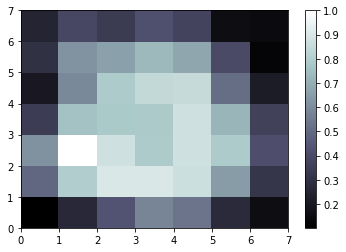

In [52]:
# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

In [53]:
data.view

<function ndarray.view>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


ValueError: 'c' argument has 200 elements, which is not acceptable for use with 'x' with size 2225, 'y' with size 2225.

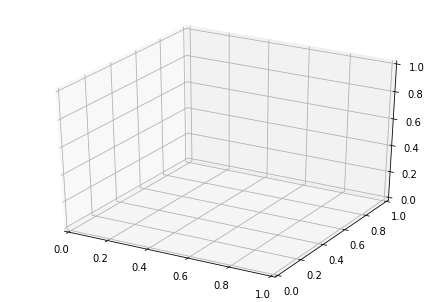

In [55]:
data = np.genfromtxt('News222.csv', delimiter=';', usecols=(0, 1, 2, 3))
# data normalization
#data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
data = np.float32(data)

colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
colors.extend(["yellow"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(150)

In [56]:
#c1 = np.random.rand(50, 3)/5
c1 = np.genfromtxt('News222.csv', delimiter=';', usecols=(0, 1, 2, 3), max_rows = 50) 
#c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c2 = np.genfromtxt('News222.csv', delimiter=';', usecols=(0, 1, 2, 3),skip_header = 50, max_rows = 50)
#c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
c3 = np.genfromtxt('News222.csv', delimiter=';', usecols=(0, 1, 2, 3),skip_header=100, max_rows = 20)
#c4 = np.genfromtxt('submission/kohonen-maps/iris.csv', delimiter=',', usecols=(3))
datax = np.float32(np.concatenate((c1, c2, c3)))

In [57]:
datax

array([[           nan, 0.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [2.87233144e-02, 2.87233144e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.62298161e-03, 3.96474684e-03],
       [0.00000000e+00, 0.00000000e+00, 4.38947696e-03, 0.00000000e+00],
       [2.48703989e-03, 2.48703989e-03, 0.00000000e+00, 6.77800132e-03],
       [6.57559559e-03, 6.57559559e-03, 0.00000000e+00, 9.87257157e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.91877692e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.12759301e-02, 1.27498312e-02],
       [1.28276357e-02, 1.28276357e-02, 0.00000000e+00, 1.11519673e-03],
       [5.02000935e-03, 5.02000935e-03, 1.90770365e-02, 0.00000000e+00],
       [2.95777507e-02, 2.95777507e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.83881279e-02, 7.43267068e-04],
       [7.48981582e-03, 7.48981582e-03, 0.00000000e

In [58]:
colors = ["red"] * 30
colors.extend(["green"] * 30)
colors.extend(["blue"] * 30)
colors.extend(["yellow"] * 30)



C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


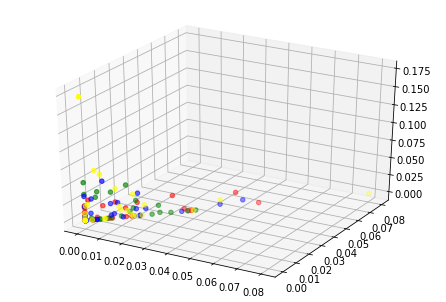

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(datax[:, 0], datax[:, 1], datax[:, 2], datax[:, 3], c=colors)
labels = range(150)

In [63]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=datax)


In [64]:
%time som.train()

NameError: name 'wrap_train' is not defined

In [62]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

IndexError: too many indices for array

<Figure size 576x360 with 0 Axes>

In [ ]:
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
colors.extend(["yellow"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(150)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)